In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_health = pd.read_csv('sample_data/insurance.csv')

# New section

In [5]:
df_health.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [6]:
df_health.shape

(1338, 7)

In [7]:
df_health.isnull().sum()

,0
age,66
sex,66
bmi,66
children,66
smoker,66
region,66
charges,54


In [8]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [9]:
df_health = df_health.dropna()

In [10]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [11]:
df_health['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [12]:
df_health['region'] = df_health['region'].str.lower()

In [13]:
df_health['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
df_health['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [15]:
FEMALE = 'female'
MALE = 'male'

sex_map = {'F':FEMALE,'woman':FEMALE,'man':MALE,'M':MALE}

df_health['sex'] = df_health['sex'].replace(sex_map)

df_health['sex'].unique()


array(['female', 'male'], dtype=object)

In [16]:
df_health['smoker'] = (df_health['smoker'] == 'yes')

In [17]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 67.2+ KB


In [18]:
df_health['charges'] = df_health['charges'].str.strip('$').astype('float64')

In [19]:
df_health = df_health.apply(lambda x:x.abs() if np.issubdtype(x.dtype,np.number) else x)

In [20]:
df_health.sample(10)

,age,sex,bmi,children,smoker,region,charges
543,54.0,female,47.41,0.0,True,southeast,63770.42801
189,29.0,female,32.11,2.0,False,northwest,4922.91590
175,63.0,female,37.70,0.0,True,southwest,48824.45000
409,32.0,male,30.03,1.0,False,southeast,4074.45370
934,32.0,male,37.18,2.0,False,southeast,4673.39220
846,51.0,female,34.20,1.0,False,southwest,9872.70100
1099,25.0,female,33.99,1.0,False,southeast,3227.12110
1032,30.0,female,27.93,0.0,False,northeast,4137.52270
709,36.0,female,27.74,0.0,False,northeast,5469.00660
605,51.0,female,34.10,0.0,False,southeast,9283.56200


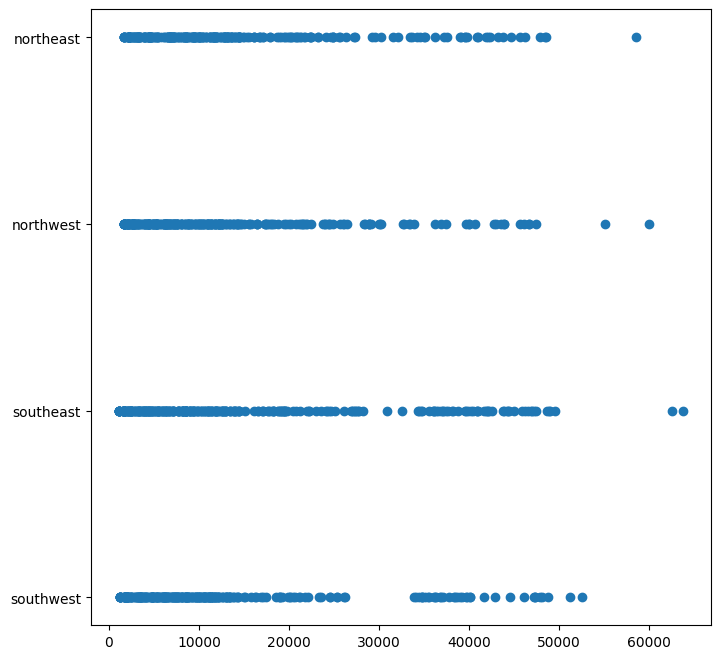

In [21]:
plt.subplots(figsize=(8,8))
plt.scatter(df_health['charges'],df_health['region'])
plt.show()

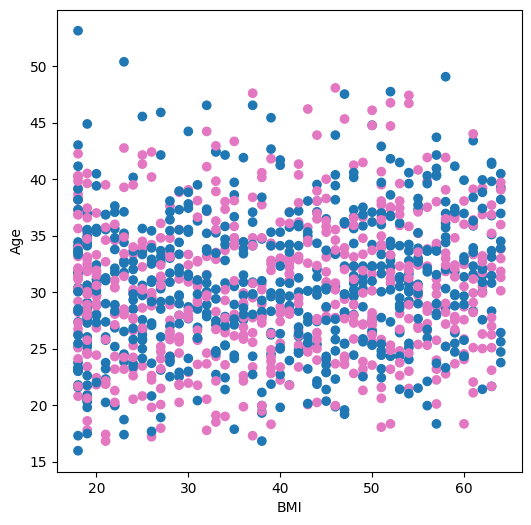

In [22]:
plt.subplots(figsize=(6,6))
colors = {'male':'tab:blue', 'female':'tab:pink'}
plt.scatter(df_health['age'],df_health['bmi'],c=df_health['sex'].map(colors))
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

Text(0.5, 1.0, 'Count of Male and Female Smoker')

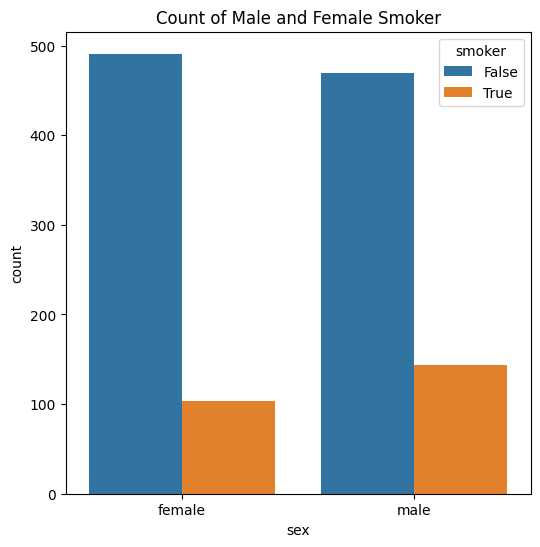

In [23]:
fig , ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(data=df_health,x='sex',hue='smoker')
plt.title('Count of Male and Female Smoker')

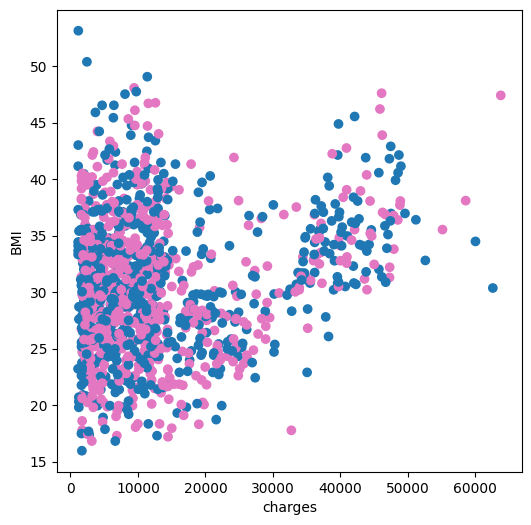

In [24]:
plt.subplots(figsize=(6,6))
colors = {'male':'tab:blue', 'female':'tab:pink'}
plt.scatter(df_health['charges'],df_health['bmi'],c=df_health['sex'].map(colors))
plt.xlabel('charges')
plt.ylabel('BMI')
plt.show()

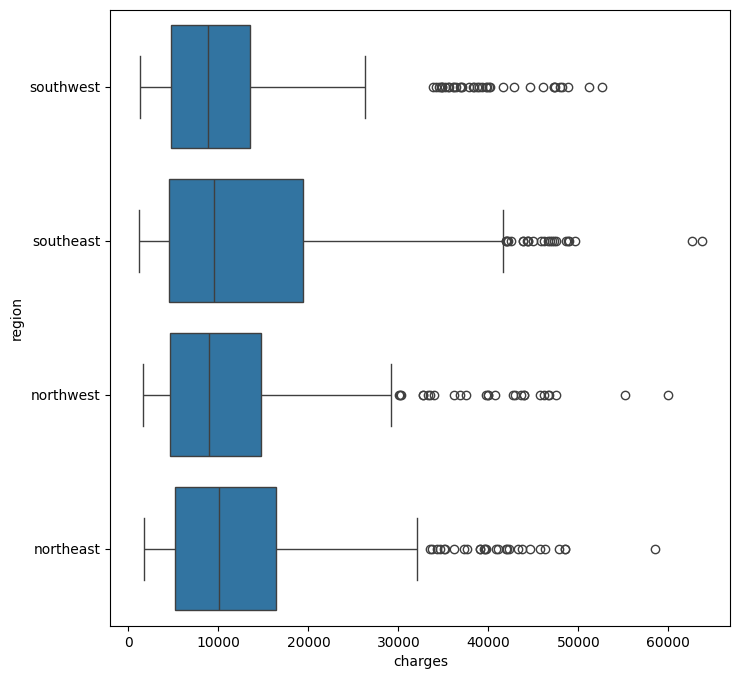

In [25]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df_health,x='charges',y='region')
plt.show()

In [26]:
df_health_new = pd.get_dummies(df_health,prefix=['region'],columns=['region'])
df_health_new = df_health_new.drop(columns=['region_southeast'])

df_health_new.head()

df_health_new['smoker'] = df_health_new['smoker'].astype('int64')

df_health_new['is_male'] = (df_health_new['sex'] == 'male').astype('int64')

df_health_new = df_health_new.drop(columns=['sex'])

df_health_new.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,1
2,28.0,33.000,3.0,0,4449.46200,False,False,False,1
3,33.0,22.705,0.0,0,21984.47061,False,True,False,1
4,32.0,28.880,0.0,0,3866.85520,False,True,False,1


In [27]:
df_health_new = df_health_new.dropna()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_health_new.drop(columns=['charges'])
y = df_health_new['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test,y_pred)

In [30]:
mse

39936613.363110945

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2 = r2_score(y_test,y_pred)

In [33]:
r2

0.7049323160872818

In [34]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test,y_pred)

r2


0.6798796866148138

In [35]:
val_df = pd.read_csv('sample_data/validation_dataset.csv')

In [36]:
val_df.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [37]:
def preProcessing(df):
  df_health_new = pd.get_dummies(df,prefix=['region'],columns=['region'])

  df_health_new = df_health_new.drop(columns=['region_southeast'])

  df_health_new['smoker'] = (df_health_new['smoker'] == 'yes')

  df_health_new['smoker'] = df_health_new['smoker'].astype('int64')

  df_health_new['is_male'] = (df_health_new['sex'] == 'male').astype('int64')

  df_health_new = df_health_new.drop(columns=['sex'])

  return df_health_new


In [38]:
input_df = preProcessing(val_df)

predictions = model.predict(input_df)

In [39]:
predictions

array([ 5271.20028633, 31226.47605783, 30074.95739053, 45354.14917906,
        7015.9897529 , 45526.33303741,  6888.66032522,  9883.77485964,
       10677.28946014, 15575.81591497,  5556.39129441, 11971.38849407,
       14338.22779778, 12219.56301445,  4137.62272016,  4003.22201328,
       22620.74855778, 50900.36977098, 44344.04998261, 11859.53828804,
        3679.0230861 , 11440.49445112, 30925.78610642, 10589.19855188,
        8624.54326963,  4626.1085366 , 45329.04250173,  5642.10933705,
       14339.01026305,  9329.70612181,  6189.05363658, 29171.11193227,
       33131.7120322 , 13612.57618038, 33349.75917573, 10279.7578455 ,
       44865.86664946, 11393.63423736,  4767.92844564, 20373.59648383,
       29113.17648052,  8469.52184802,  5196.93359844, 45856.28098055,
        5246.74600708, 36452.23948893, 48565.18990224, 28911.43127062,
       12792.46681636, 34937.81050197])

In [40]:
predictions_new = [x if x>0 else 1000 for x in predictions]

validation_data = val_df.copy()

validation_data['predictions_charges'] = predictions_new

validation_data.head()

,age,sex,bmi,children,smoker,region,predictions_charges
0,18.0,female,24.090000,1.0,no,southeast,5271.200286
1,39.0,male,26.410000,0.0,yes,northeast,31226.476058
2,27.0,male,29.150000,0.0,yes,southeast,30074.957391
3,71.0,male,65.502135,13.0,yes,southeast,45354.149179
4,28.0,male,38.060000,0.0,no,southeast,7015.989753
